In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('South_East_Asia_Social_Media_MentalHealth.csv')

In [3]:
df.head

<bound method NDFrame.head of             Country Age Group  Gender Urban/Rural  Daily SM Usage (hrs)  \
0           Myanmar     18-25    Male       Rural                  2.89   
1         Indonesia     18-25  Female       Urban                  3.24   
2           Vietnam     36-45    Male       Rural                  7.84   
3       Philippines     26-35    Male       Urban                  1.25   
4              Laos     56-65    Male       Rural                  3.94   
...             ...       ...     ...         ...                   ...   
340911       Brunei     46-55    Male       Rural                 10.02   
340912  Philippines     26-35    Male       Urban                  3.97   
340913  Philippines     18-25  Female       Rural                  1.01   
340914         Laos     36-45    Male       Urban                  4.14   
340915     Cambodia     46-55  Female       Urban                  6.47   

       Most Used SM Platform Frequency of SM Use  Likes Received (per

In [4]:
df.columns

Index(['Country', 'Age Group', 'Gender', 'Urban/Rural', 'Daily SM Usage (hrs)',
       'Most Used SM Platform', 'Frequency of SM Use',
       'Likes Received (per post)', 'Comments Received (per post)',
       'Shares Received (per post)', 'Peer Comparison Frequency (1-10)',
       'Social Anxiety Level (1-10)', 'Socioeconomic Status',
       'Education Level', 'State', 'Body Image Impact (1-10)',
       'Sleep Quality Impact (1-10)', 'Self Confidence Impact (1-10)',
       'Cyberbullying Experience (1-10)', 'Anxiety Levels (1-10)'],
      dtype='object')

In [7]:
df.describe()

,Daily SM Usage (hrs),Likes Received (per post),Comments Received (per post),Shares Received (per post),Peer Comparison Frequency (1-10),Social Anxiety Level (1-10),Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10)
count,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000,340916.000000
mean,6.245035,504.145625,249.431807,149.477446,5.500085,5.493066,5.500519,5.507656,5.495474,5.494271,5.513302
std,3.318339,285.881019,144.418097,86.669715,2.872107,2.874396,2.869364,2.868597,2.869748,2.869975,2.873180
min,0.500000,10.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.370000,257.000000,124.000000,74.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,6.240000,504.000000,250.000000,150.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000
75%,9.120000,752.000000,374.000000,225.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,12.000000,999.000000,499.000000,299.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df.tail

<bound method NDFrame.tail of             Country Age Group  Gender Urban/Rural  Daily SM Usage (hrs)  \
0           Myanmar     18-25    Male       Rural                  2.89   
1         Indonesia     18-25  Female       Urban                  3.24   
2           Vietnam     36-45    Male       Rural                  7.84   
3       Philippines     26-35    Male       Urban                  1.25   
4              Laos     56-65    Male       Rural                  3.94   
...             ...       ...     ...         ...                   ...   
340911       Brunei     46-55    Male       Rural                 10.02   
340912  Philippines     26-35    Male       Urban                  3.97   
340913  Philippines     18-25  Female       Rural                  1.01   
340914         Laos     36-45    Male       Urban                  4.14   
340915     Cambodia     46-55  Female       Urban                  6.47   

       Most Used SM Platform Frequency of SM Use  Likes Received (per

In [35]:
df.shape

(340916, 21)

In [9]:
#To handle missing values
df.isnull().sum()

Country                             0
Age Group                           0
Gender                              0
Urban/Rural                         0
Daily SM Usage (hrs)                0
Most Used SM Platform               0
Frequency of SM Use                 0
Likes Received (per post)           0
Comments Received (per post)        0
Shares Received (per post)          0
Peer Comparison Frequency (1-10)    0
Social Anxiety Level (1-10)         0
Socioeconomic Status                0
Education Level                     0
State                               0
Body Image Impact (1-10)            0
Sleep Quality Impact (1-10)         0
Self Confidence Impact (1-10)       0
Cyberbullying Experience (1-10)     0
Anxiety Levels (1-10)               0
dtype: int64

From above it is clear there is no any null data available.

In [11]:
label_enc = LabelEncoder()
df['Most Used SM Platform'] = label_enc.fit_transform(df['Most Used SM Platform'])

scaler = StandardScaler()
df[['Daily SM Usage (hrs)', 'Anxiety Levels (1-10)']] = scaler.fit_transform(df[['Daily SM Usage (hrs)', 'Anxiety Levels (1-10)']])

In [13]:
# Select only numerical columns for correlation
df_numeric = df.select_dtypes(include=['number'])

In [14]:
df_numeric

,Daily SM Usage (hrs),Most Used SM Platform,Likes Received (per post),Comments Received (per post),Shares Received (per post),Peer Comparison Frequency (1-10),Social Anxiety Level (1-10),Body Image Impact (1-10),Sleep Quality Impact (1-10),Self Confidence Impact (1-10),Cyberbullying Experience (1-10),Anxiety Levels (1-10)
0,-1.011060,4,652,80,226,1,1,7,1,8,6,0.169394
1,-0.905585,1,295,429,45,8,2,6,4,5,3,-0.874747
2,0.480652,1,412,64,2,8,10,3,8,6,2,-0.874747
3,-1.505284,4,387,309,273,1,7,2,3,3,10,-1.222794
4,-0.694636,0,148,45,180,10,10,9,2,6,3,0.169394
...,...,...,...,...,...,...,...,...,...,...,...,...
340911,1.137608,3,870,174,234,4,6,9,6,4,7,1.213534
340912,-0.685595,2,128,457,8,8,7,10,2,9,1,-1.570841
340913,-1.577609,1,115,356,68,3,8,2,9,6,4,-1.222794
340914,-0.634365,2,257,108,114,8,6,8,7,2,4,-0.526700


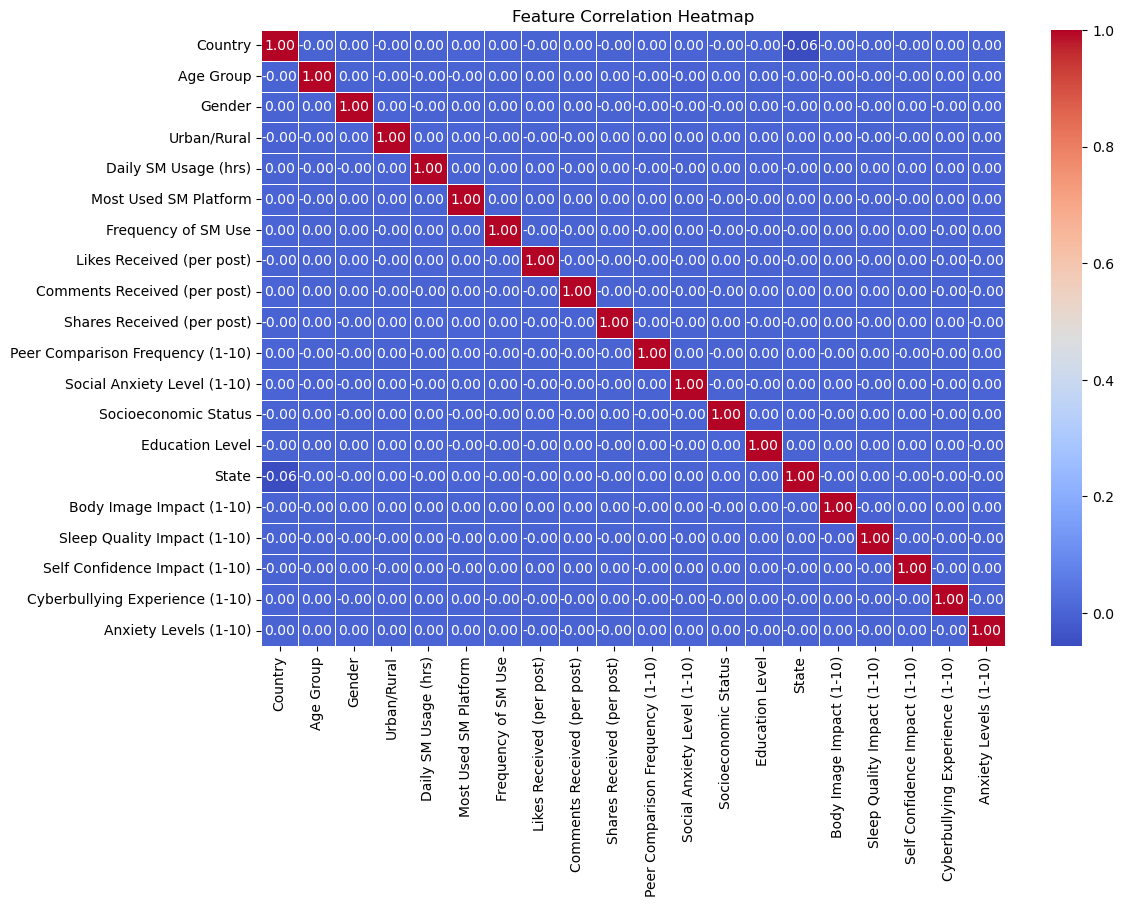

In [15]:
# Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
#Anxiety levels using machine learning

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = df.drop(columns=['Anxiety Levels (1-10)'])
y = df['Anxiety Levels (1-10)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.0094461739927045


In [17]:
#Classify individuals into high vs. low anxiety groups

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert anxiety levels to binary classification (High Anxiety: 1 if >5, else 0)
df['Anxiety_High'] = (df['Anxiety Levels (1-10)'] > 5).astype(int)

# Define features and target
X = df.drop(columns=['Anxiety Levels (1-10)', 'Anxiety_High'])
y = df['Anxiety_High']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample Data (Replace with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     68184

    accuracy                           1.00     68184
   macro avg       1.00      1.00      1.00     68184
weighted avg       1.00      1.00      1.00     68184



In [22]:
# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print(importance_df.head(10))

                             Feature  Importance
0                            Country         0.0
10  Peer Comparison Frequency (1-10)         0.0
17     Self Confidence Impact (1-10)         0.0
16       Sleep Quality Impact (1-10)         0.0
15          Body Image Impact (1-10)         0.0
14                             State         0.0
13                   Education Level         0.0
12              Socioeconomic Status         0.0
11       Social Anxiety Level (1-10)         0.0
9         Shares Received (per post)         0.0


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
import joblib

# Save the model
joblib.dump(model, "random_forest_model.pkl")

# Load the model
loaded_model = joblib.load("random_forest_model.pkl")

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)


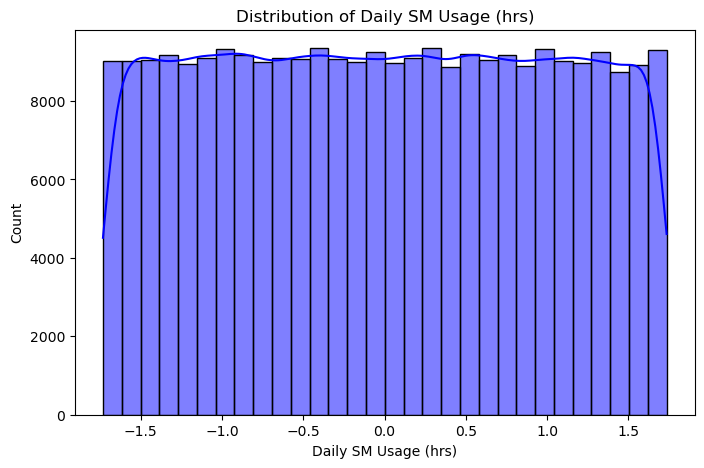

In [25]:
# Select a feature (e.g., 'Daily SM Usage (hrs)')
feature = 'Daily SM Usage (hrs)'

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(X_train[feature], bins=30, kde=True, color="blue")

# Labels
plt.title(f"Distribution of {feature}")
plt.xlabel(feature)
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Feature Name')

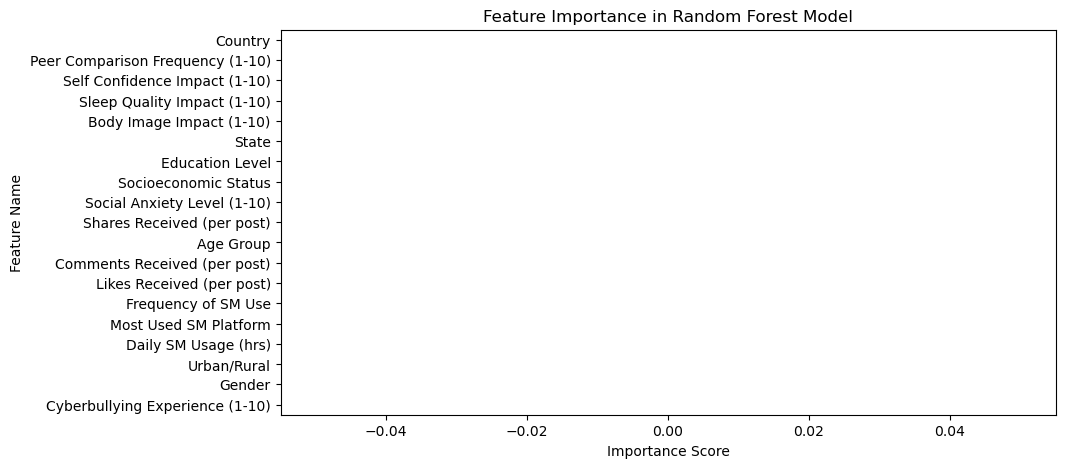

In [26]:
# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")

plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")


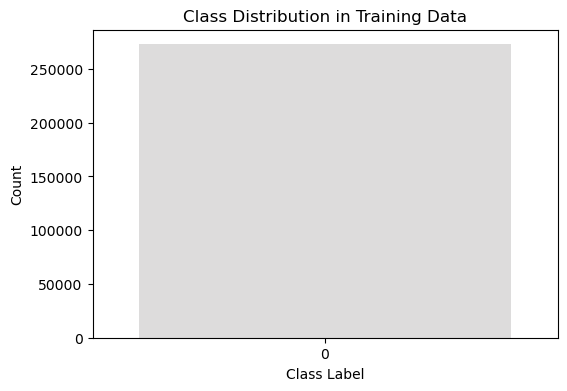

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette="coolwarm")

plt.title("Class Distribution in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.show()


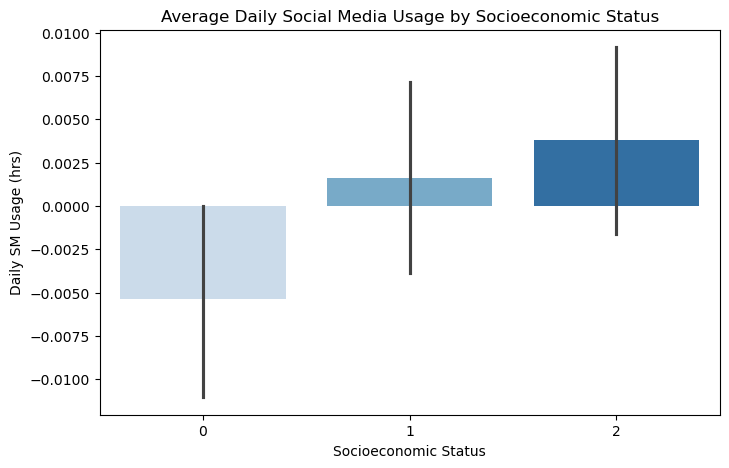

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Socioeconomic Status", y="Daily SM Usage (hrs)", data=df, palette="Blues")

plt.title("Average Daily Social Media Usage by Socioeconomic Status")
plt.xlabel("Socioeconomic Status")
plt.ylabel("Daily SM Usage (hrs)")

plt.show()


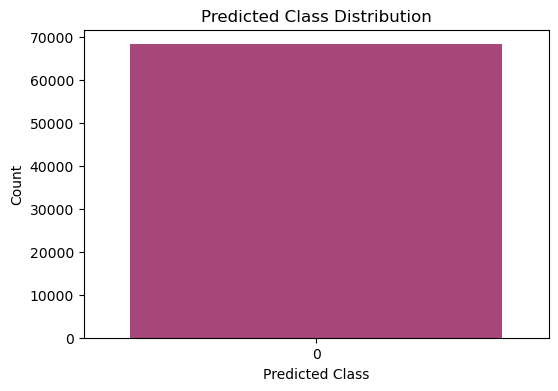

In [29]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))
sns.barplot(x=pd.Series(y_pred).value_counts().index, y=pd.Series(y_pred).value_counts().values, palette="magma")

plt.title("Predicted Class Distribution")
plt.xlabel("Predicted Class")
plt.ylabel("Count")

plt.show()


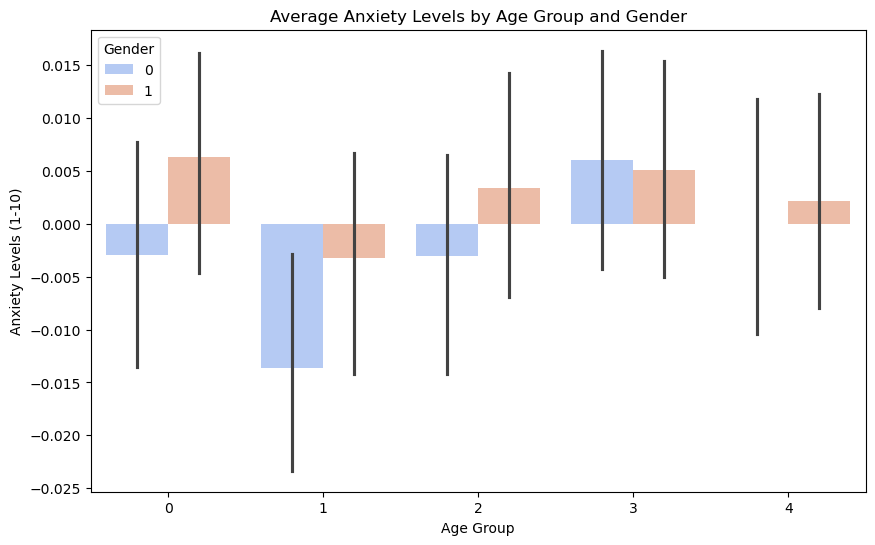

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Age Group", y="Anxiety Levels (1-10)", hue="Gender", data=df, palette="coolwarm")

plt.title("Average Anxiety Levels by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Anxiety Levels (1-10)")
plt.legend(title="Gender")

plt.show()


<Figure size 1200x600 with 0 Axes>

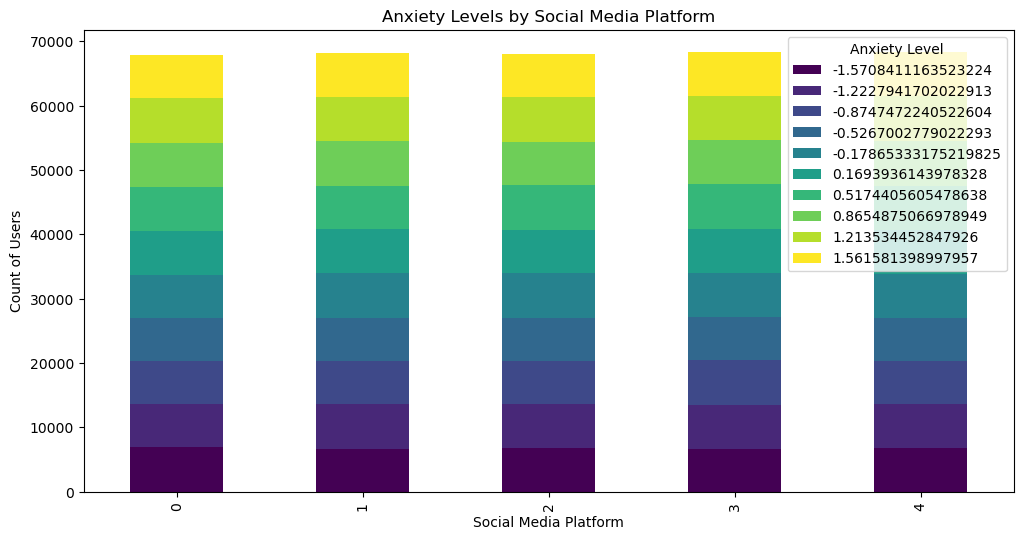

In [31]:
import numpy as np

plt.figure(figsize=(12, 6))

# Pivot data for stacking
stacked_data = df.groupby(["Most Used SM Platform", "Anxiety Levels (1-10)"]).size().unstack()

# Plot stacked bar chart
stacked_data.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))

plt.title("Anxiety Levels by Social Media Platform")
plt.xlabel("Social Media Platform")
plt.ylabel("Count of Users")
plt.legend(title="Anxiety Level")

plt.show()


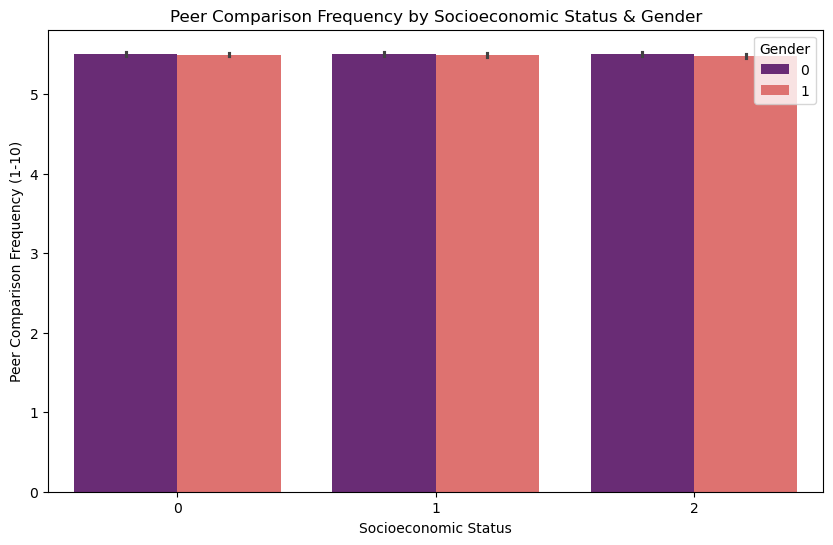

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Socioeconomic Status", y="Peer Comparison Frequency (1-10)", hue="Gender", data=df, palette="magma")

plt.title("Peer Comparison Frequency by Socioeconomic Status & Gender")
plt.xlabel("Socioeconomic Status")
plt.ylabel("Peer Comparison Frequency (1-10)")
plt.legend(title="Gender")

plt.show()


<Figure size 1200x600 with 0 Axes>

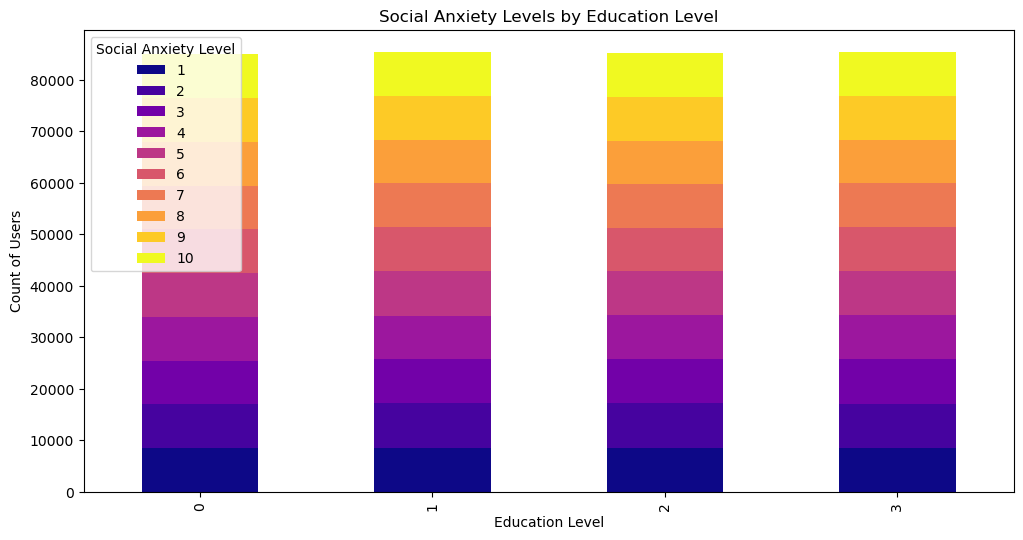

In [33]:
plt.figure(figsize=(12, 6))

# Pivot data for stacking
stacked_data = df.groupby(["Education Level", "Social Anxiety Level (1-10)"]).size().unstack()

# Plot stacked bar chart
stacked_data.plot(kind="bar", stacked=True, colormap="plasma", figsize=(12, 6))

plt.title("Social Anxiety Levels by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count of Users")
plt.legend(title="Social Anxiety Level")

plt.show()
